In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
print(train.shape)
print(test.shape)
train.head()

(10886, 12)
(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Preprocessing

<hr/>

### datetime 

In [4]:
# datatime은 datetime의 데이터 타입임으로 정수형으로 교환
train['datetime'] = pd.to_datetime(train['datetime'])
train[['datetime']].head()

,datetime
0,2011-01-01 00:00:00
1,2011-01-01 01:00:00
2,2011-01-01 02:00:00
3,2011-01-01 03:00:00
4,2011-01-01 04:00:00


In [5]:
# datetime을 조금 더 세부적으로 분석하기 위해서 분리
train['datetime_year'] = train['datetime'].dt.year
train['datetime_month'] = train['datetime'].dt.month
train['datetime_day'] = train['datetime'].dt.day
train['datetime_hour'] = train['datetime'].dt.hour
train['datetime_minute'] = train['datetime'].dt.minute
train['datetime_second'] = train['datetime'].dt.second

train[["datetime", "datetime_year", "datetime_month", "datetime_day",
       "datetime_hour", "datetime_minute", "datetime_second"]].head()

,datetime,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


In [6]:
# test데이터 또한 같이 전처리 해준다.

test['datetime'] = pd.to_datetime(test['datetime'])
test[['datetime']].head()

# datetime을 조금 더 세부적으로 분석하기 위해서 분리
test['datetime_year'] = test['datetime'].dt.year
test['datetime_month'] = test['datetime'].dt.month
test['datetime_day'] = test['datetime'].dt.day
test['datetime_hour'] = test['datetime'].dt.hour
test['datetime_minute'] = test['datetime'].dt.minute
test['datetime_second'] = test['datetime'].dt.second

test[["datetime", "datetime_year", "datetime_month", "datetime_day",
       "datetime_hour", "datetime_minute", "datetime_second"]].head()

,datetime,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second
0,2011-01-20 00:00:00,2011,1,20,0,0,0
1,2011-01-20 01:00:00,2011,1,20,1,0,0
2,2011-01-20 02:00:00,2011,1,20,2,0,0
3,2011-01-20 03:00:00,2011,1,20,3,0,0
4,2011-01-20 04:00:00,2011,1,20,4,0,0


### Explore

In [7]:
#matplotlib으로 실행되는 모든 시각화를 자동을 쥬피터 노트북에 띄워주는 명령어 
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# 시각화 전에 어떤 시각화가 나올지 예상 3가지 

# 1. datetime_minute와 datetime_second의 모든 데이터가 0이기 때문에 쓸모없는 feature일 것이다
# 2. datetime_hour컬럼에서는 출퇴근 시간대의 자전거 대여량이 증가했을것이다3 
# 3. datetime_month컬럼에서는 여름 철인 6~8월에는 자전거 대여량이 증가할 것이고 겨울철은 11~1월에는 자전거 대여량이 갑소할 것이다.

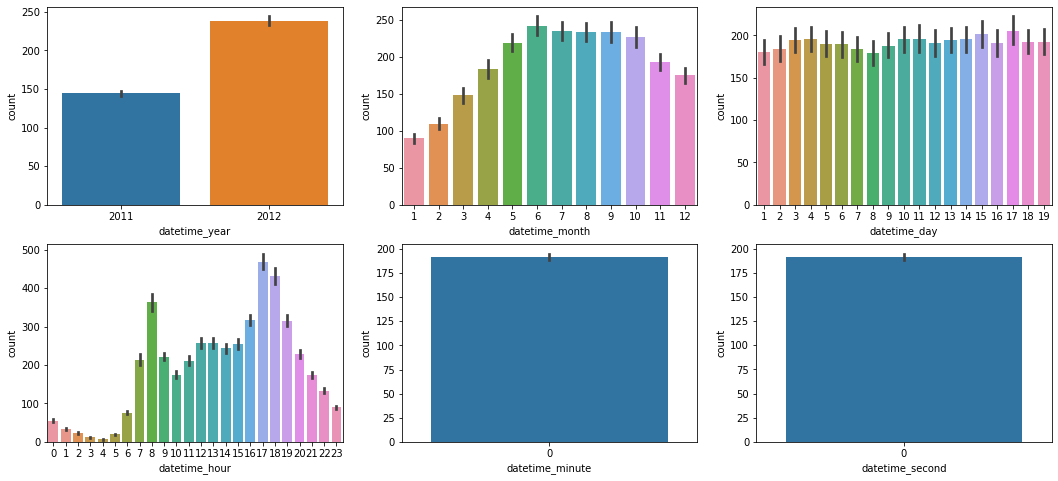

In [9]:
# 시각화
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)
figure.set_size_inches(18,8)

sns.barplot(data=train,x='datetime_year',y='count',ax=ax1)
sns.barplot(data=train,x='datetime_month',y='count',ax=ax2)
sns.barplot(data=train,x='datetime_day',y='count',ax=ax3)
sns.barplot(data=train,x='datetime_hour',y='count',ax=ax4)
sns.barplot(data=train,x='datetime_minute',y='count',ax=ax5)
sns.barplot(data=train,x='datetime_second',y='count',ax=ax6)

In [10]:
# 시각화를 통해서 알수있는 사실
# datetime_year : 자전거 대여량이 늘고 있다.
# datetime_month : .
# datetime_day : 데이터가 19일까지인것을 봐서 train test구분의 기준이 day이므로 의미없는 컬럼이다
# datetime_hour : 출퇴근 시간인 7~9 /17~18시에 사용량이 급증했다.
# datetime_minute : 데이터가 없다..
# datetime_second : 데이터가 없다.

In [11]:
# 예측 모델을 개선시킬수 있는 방법 3가지

# 1.의미없는 minute와 second 컬럼 제거
# 2.가장 뚜렷한 데이터인 hour데이터를 출퇴근시간으로 분류?
# 3.겨울과 여름의 데이터 분리 

### weather

In [12]:
#시각화전 예상 3가지 
# 1. 날씨가 좋을 수록 대여량이 많을 것이다. 
# 2. ? ? ? ? ? ? ?
# 3. ? ? ? ? ? ? ? 

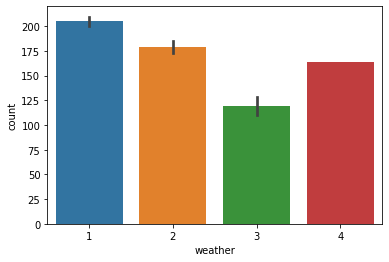

In [13]:
# 시각화 
sns.barplot(data = train, x="weather" ,y= 'count')

In [14]:
# 시각화 후 
# 1. 날씨가 좋을수록 대여량이 많으나 4가 3보다 많다는것이 이상함
# 2. 날씨가 숫자값으로 되어있지만 카테고릭컬 데이터기때문에 onthot인코딩을 사용하자
# 3. 4번의 신뢰구간이 없으므로 원인을 찾자 
train[train['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,0,0


In [15]:
# 전처리 
# 1. 4를 3으로 
train.loc[train['weather'] ==4,'weather']=3
train[train['weather']== 3].head()

test.loc[test['weather'] ==4,'weather']=3
test[test['weather']== 3].head()

# 2. 원핫인코딩
weather_oh = pd.get_dummies(train['weather'])

train.loc[train['weather'] == 1, 'weather_1'] = weather_oh[1]
train.loc[train['weather'] == 2, 'weather_2'] = weather_oh[2]
train.loc[train['weather'] == 3, 'weather_3'] = weather_oh[3]

test.loc[test['weather'] == 1, 'weather_1'] = weather_oh[1]
test.loc[test['weather'] == 2, 'weather_2'] = weather_oh[2]
test.loc[test['weather'] == 3, 'weather_3'] = weather_oh[3]

##############################################################

train['weather_1'] = train['weather_1'].fillna(0)
train['weather_2'] = train['weather_2'].fillna(0)
train['weather_3'] = train['weather_3'].fillna(0)

test['weather_1'] = test['weather_1'].fillna(0)
test['weather_2'] = test['weather_2'].fillna(0)
test['weather_3'] = test['weather_3'].fillna(0)

###############################################################

train[['weather_1','weather_2','weather_3']]
test[['weather_1','weather_2','weather_3']]

,weather_1,weather_2,weather_3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
6488,0.0,0.0,0.0
6489,0.0,0.0,0.0
6490,1.0,0.0,0.0
6491,1.0,0.0,0.0


### windspeed

In [16]:
# 시각화 전에 예상 3가지 
# 1. 연속형 자료형이므로 정규분포가 나올것입니다.
# 2. 풍속이 강할 수록 대려량은 감소했을것입니다.
# 3. 

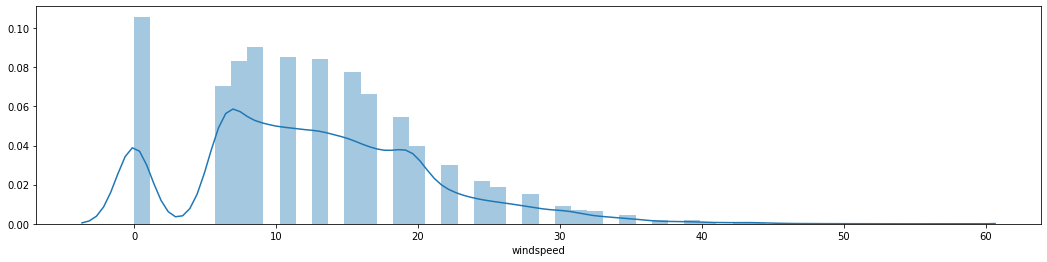

In [17]:
plt.figure(figsize=(18,4))

sns.distplot(train['windspeed'])

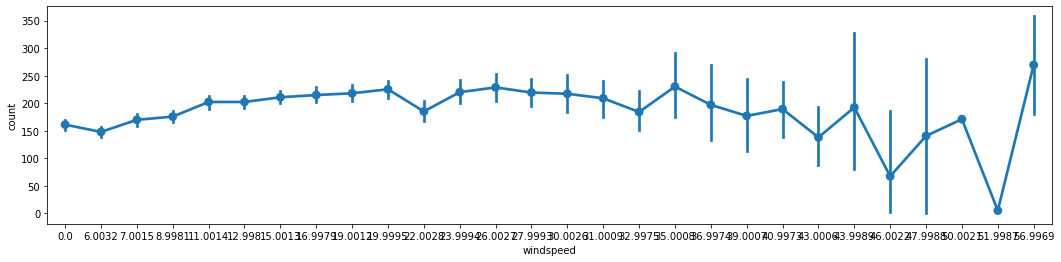

In [18]:
plt.figure(figsize=(18,4))
sns.pointplot(data= train, x='windspeed',y='count')

[0.    0.003 0.998 0.001 1.    0.998 0.001 0.998 0.001 0.003 0.003 0.999
 0.999 0.003 0.002 0.998 0.997 0.001 0.001 0.001 0.999 0.997 0.999 0.002
 0.002 0.001 0.997 0.999]


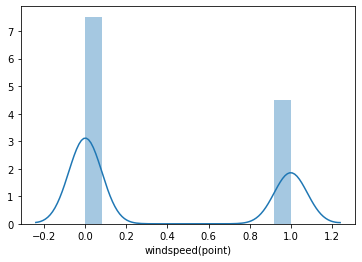

In [19]:
# 풍속데이터에서 소수점만 남기고 다 제거 
train["windspeed(point)"]  = train['windspeed'] - train['windspeed'].astype('int')
# 소수점 3자리까지 반올림 / 중복제거 
print(train['windspeed(point)'].unique().round(3))

# 시각화 
sns.distplot(train['windspeed(point)'])

In [20]:
# 시각화 후 알수 있는 것들 

# 1. 데이터가 연속적이지 않고 뚝뚝 끊긴것을 볼수있었다.
# 2. 바람이 강할수록 대여량이 감소했다
# 3. 풍속이 0인경우가 굉장히 많으며 정규분포가 이상하게 보일정도로 비중이높음

In [21]:
# 모델 개선 3가지
# 1. 풍속데이터를 그대로 집어 넣어서 학습
# 2. 풍속이 0인경우는 Nan값일 가능성이 높으니 해결
# 3. 풍속의 데이터에서 소수점자리의 숫자를 반올림하여 정수형태로 변환후 학습

In [22]:
# 전처리 
# 3.
train['windspeed_clean'] = train[['windspeed']].round()
test['windspeed_clean'] = test[['windspeed']].round()

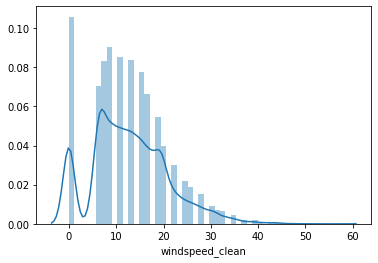

In [23]:
# sns.pointplot(data= train, x='windspeed_clean',y='count')
sns.distplot(train['windspeed_clean'])

### temp

In [24]:
# 예상 3가지 
#1. 온도가 낮으면 대여량이 감소
#2. 온도가 높으면 대려량이 감소
#3. atemp와 비슷한 성향을 가진다

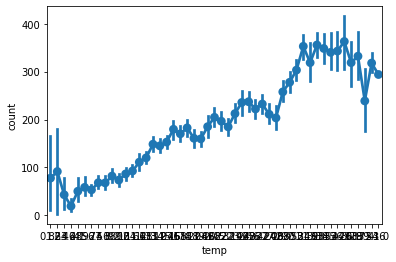

In [25]:
# sns.barplot(data=train, x='temp',y='count')
sns.pointplot(data=train,x='temp',y='count')

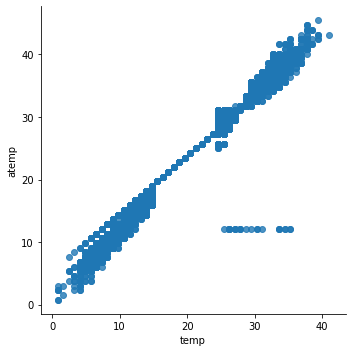

In [26]:
#lmplot으로 temp와 atemp상관관계를 시각화
sns.lmplot(data=train, x='temp', y='atemp',fit_reg=False)

In [27]:
train['temp'].unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [28]:
train['atemp'].unique()

array([14.395, 13.635, 12.88 , 17.425, 19.695, 16.665, 21.21 , 22.725,
       21.97 , 20.455, 11.365, 10.605,  9.85 ,  8.335,  6.82 ,  5.305,
        6.06 ,  9.09 , 12.12 ,  7.575, 15.91 ,  3.03 ,  3.79 ,  4.545,
       15.15 , 18.18 , 25.   , 26.515, 27.275, 29.545, 23.485, 25.76 ,
       31.06 , 30.305, 24.24 , 18.94 , 31.82 , 32.575, 33.335, 28.79 ,
       34.85 , 35.605, 37.12 , 40.15 , 41.665, 40.91 , 39.395, 34.09 ,
       28.03 , 36.365, 37.88 , 42.425, 43.94 , 38.635,  1.515,  0.76 ,
        2.275, 43.18 , 44.695, 45.455])

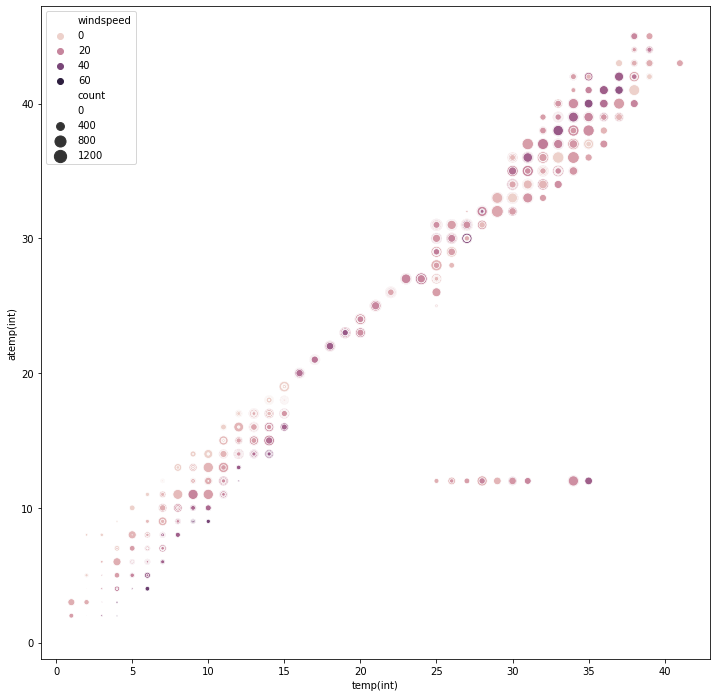

In [29]:
train['temp(int)'] = train['temp'].round()
train['atemp(int)'] = train['atemp'].round()

test['temp(int)'] = test['temp'].round()
test['atemp(int)'] = test['atemp'].round()

plt.figure(figsize=(12,12))

sns.scatterplot(data=train,x='temp(int)',y='atemp(int)',hue='windspeed',size= 'count',sizes=(0,150))

In [30]:
train['temp(difference)'] = train['temp(int)']-train['atemp(int)']

test['temp(difference)'] = test['temp(int)']-test['atemp(int)']

train[['temp(int)','atemp(int)','temp(difference)']].head()

,temp(int),atemp(int),temp(difference)
0,10.0,14.0,-4.0
1,9.0,14.0,-5.0
2,9.0,14.0,-5.0
3,10.0,14.0,-4.0
4,10.0,14.0,-4.0


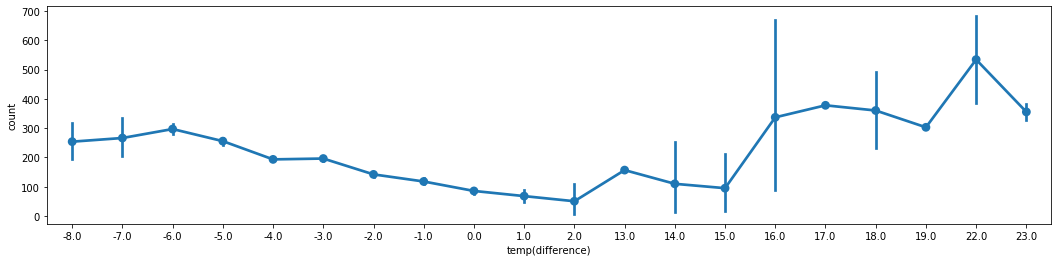

In [31]:
plt.figure(figsize=(18,4))
sns.pointplot(data=train,x='temp(difference)',y='count')

In [32]:
train['temp(difference)'].value_counts()

-4.0     5106
-3.0     2097
-2.0     1415
-5.0     1049
-1.0      509
-6.0      405
 0.0      219
 1.0       32
-7.0       21
 22.0       5
-8.0        5
 14.0       5
 2.0        4
 16.0       3
 15.0       3
 18.0       3
 23.0       2
 17.0       1
 13.0       1
 19.0       1
Name: temp(difference), dtype: int64

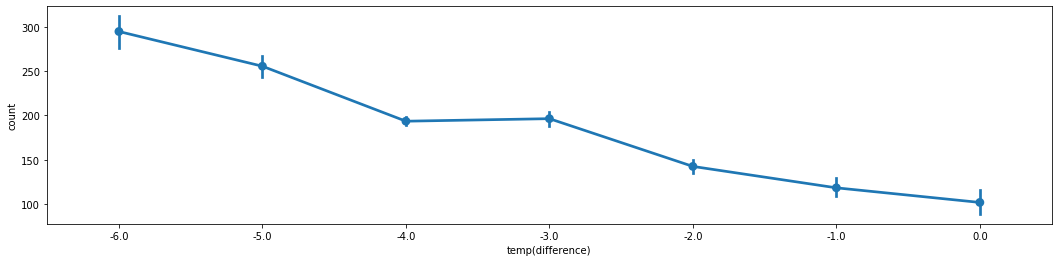

In [33]:
train.loc[train['temp(difference)'] < -6 , 'temp(difference)'] = -6
train.loc[train['temp(difference)'] > 0, 'temp(difference)' ] = 0

test.loc[test['temp(difference)'] < -6 , 'temp(difference)'] = -6
test.loc[test['temp(difference)'] > 0, 'temp(difference)' ] = 0

plt.figure(figsize=(18,4))
sns.pointplot(data=train, x='temp(difference)',y='count')

In [34]:
# 시각화 후 알 개선 3가지
# 1. temp와 atemp는 밀접한 상관관계를 가지고 있다
# 2. 그러나 temp와 atemp는 매우 비슷한 성향을 가지고 있기 때문에 두중 하나만 학습시키자
# 3. temp - atemp가 자전거 대여량을 예측하는데 도움이 될 수 있다 .

### datetime-dayofweek

In [35]:
# 요일을 나타내는 새로운 칼럼을 생성

train['datetime-dayofweek'] = train['datetime'].dt.day_name()

# 숫자로 변환
train['datetime-dayofweek(int)'] = train['datetime'].dt.dayofweek

print(train.shape)
train[['datetime','datetime-dayofweek','datetime-dayofweek(int)']]

(10886, 28)


,datetime,datetime-dayofweek,datetime-dayofweek(int)
0,2011-01-01 00:00:00,Saturday,5
1,2011-01-01 01:00:00,Saturday,5
2,2011-01-01 02:00:00,Saturday,5
3,2011-01-01 03:00:00,Saturday,5
4,2011-01-01 04:00:00,Saturday,5
...,...,...,...
10881,2012-12-19 19:00:00,Wednesday,2
10882,2012-12-19 20:00:00,Wednesday,2
10883,2012-12-19 21:00:00,Wednesday,2
10884,2012-12-19 22:00:00,Wednesday,2


In [36]:
# 요일을 나타내는 새로운 칼럼을 생성

test['datetime-dayofweek'] = test['datetime'].dt.day_name()

# 숫자로 변환
test['datetime-dayofweek(int)'] = test['datetime'].dt.dayofweek

print(train.shape)
test[['datetime','datetime-dayofweek','datetime-dayofweek(int)']]

(10886, 28)


,datetime,datetime-dayofweek,datetime-dayofweek(int)
0,2011-01-20 00:00:00,Thursday,3
1,2011-01-20 01:00:00,Thursday,3
2,2011-01-20 02:00:00,Thursday,3
3,2011-01-20 03:00:00,Thursday,3
4,2011-01-20 04:00:00,Thursday,3
...,...,...,...
6488,2012-12-31 19:00:00,Monday,0
6489,2012-12-31 20:00:00,Monday,0
6490,2012-12-31 21:00:00,Monday,0
6491,2012-12-31 22:00:00,Monday,0


In [37]:
# 시각화 예상 3가지 
# 1. 주말과 주중의 대여량이 극명하게 차이가 날것
# 2. 
# 3. 

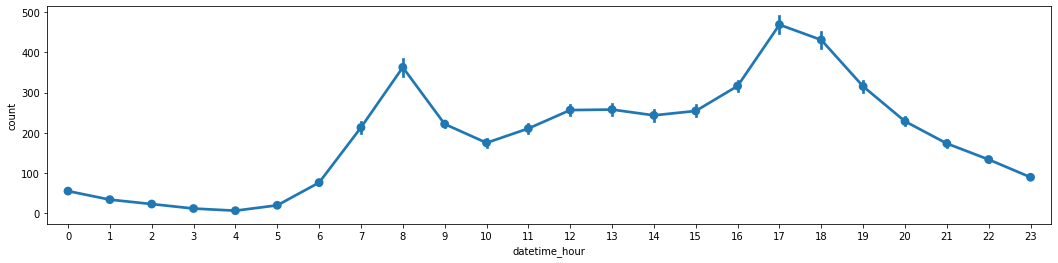

In [38]:
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x= 'datetime_hour',y='count')

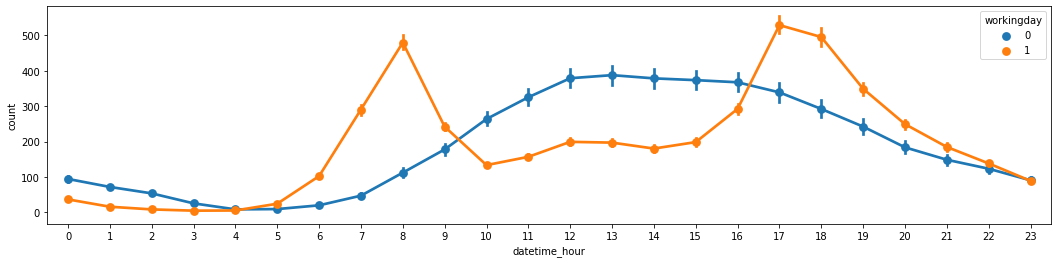

In [39]:
plt.figure(figsize=(18,4))
sns.pointplot(data=train,x='datetime_hour',y='count',hue='workingday')

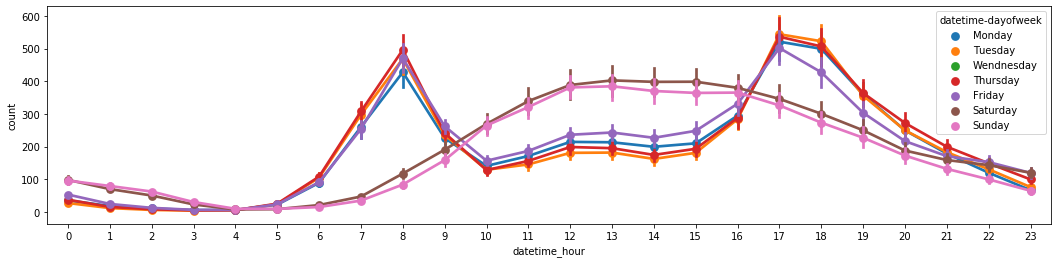

In [40]:
plt.figure(figsize=(18,4))
dayofweek_order = ["Monday","Tuesday","Wendnesday","Thursday","Friday","Saturday","Sunday"]

sns.pointplot(data=train,x='datetime_hour',y='count',hue='datetime-dayofweek',
             hue_order=dayofweek_order)

In [41]:
# 시각화로 알수 있는 3가지 
# 1. 주중은 출퇴근시간에 대여량이 많고
# 2. 주말은 오후에 대여량이 많다
# 3. 범주형 카테고릭컬 데이터라서 원핫인코딩 필요 

In [42]:
# 전처리 
pd.get_dummies(train['datetime-dayofweek'])
# pd.get_dummies(train['datetime-dayofweek(int)'])

train.loc[train['datetime-dayofweek']=='Monday', 'datetime_oh_1'] = 1
train.loc[train['datetime-dayofweek']=='Tuesday', 'datetime_oh_2'] = 1
train.loc[train['datetime-dayofweek']=='Wendnesday', 'datetime_oh_3'] = 1
train.loc[train['datetime-dayofweek']=='Thursday', 'datetime_oh_4'] = 1
train.loc[train['datetime-dayofweek']=='Friday', 'datetime_oh_5'] = 1
train.loc[train['datetime-dayofweek']=='Saturday', 'datetime_oh_6'] = 1
train.loc[train['datetime-dayofweek']=='Sunday', 'datetime_oh_7'] = 1

train[['datetime_oh_1','datetime_oh_2','datetime_oh_3',
       'datetime_oh_4','datetime_oh_5','datetime_oh_6','datetime_oh_7']]

,datetime_oh_1,datetime_oh_2,datetime_oh_3,datetime_oh_4,datetime_oh_5,datetime_oh_6,datetime_oh_7
0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...
10881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10882,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10883,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10884,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
train['datetime_oh_1'] = train['datetime_oh_1'].fillna(0)
train['datetime_oh_2'] = train['datetime_oh_2'].fillna(0)
train['datetime_oh_3'] = train['datetime_oh_3'].fillna(0)
train['datetime_oh_4'] = train['datetime_oh_4'].fillna(0)
train['datetime_oh_5'] = train['datetime_oh_5'].fillna(0)
train['datetime_oh_6'] = train['datetime_oh_6'].fillna(0)
train['datetime_oh_7'] = train['datetime_oh_7'].fillna(0)

train[['datetime_oh_1','datetime_oh_2','datetime_oh_3',
       'datetime_oh_4','datetime_oh_5','datetime_oh_6','datetime_oh_7']]

,datetime_oh_1,datetime_oh_2,datetime_oh_3,datetime_oh_4,datetime_oh_5,datetime_oh_6,datetime_oh_7
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
10881,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10882,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10883,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10884,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# 전처리 
pd.get_dummies(test['datetime-dayofweek'])
# pd.get_dummies(train['datetime-dayofweek(int)'])

test.loc[test['datetime-dayofweek']=='Monday', 'datetime_oh_1'] = 1
test.loc[test['datetime-dayofweek']=='Tuesday', 'datetime_oh_2'] = 1
test.loc[test['datetime-dayofweek']=='Wendnesday', 'datetime_oh_3'] = 1
test.loc[test['datetime-dayofweek']=='Thursday', 'datetime_oh_4'] = 1
test.loc[test['datetime-dayofweek']=='Friday', 'datetime_oh_5'] = 1
test.loc[test['datetime-dayofweek']=='Saturday', 'datetime_oh_6'] = 1
test.loc[test['datetime-dayofweek']=='Sunday', 'datetime_oh_7'] = 1

test[['datetime_oh_1','datetime_oh_2','datetime_oh_3',
       'datetime_oh_4','datetime_oh_5','datetime_oh_6','datetime_oh_7']]

,datetime_oh_1,datetime_oh_2,datetime_oh_3,datetime_oh_4,datetime_oh_5,datetime_oh_6,datetime_oh_7
0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6488,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6489,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6490,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6491,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
test['datetime_oh_1'] = test['datetime_oh_1'].fillna(0)
test['datetime_oh_2'] = test['datetime_oh_2'].fillna(0)
test['datetime_oh_3'] = test['datetime_oh_3'].fillna(0)
test['datetime_oh_4'] = test['datetime_oh_4'].fillna(0)
test['datetime_oh_5'] = test['datetime_oh_5'].fillna(0)
test['datetime_oh_6'] = test['datetime_oh_6'].fillna(0)
test['datetime_oh_7'] = test['datetime_oh_7'].fillna(0)

train[['datetime_oh_1','datetime_oh_2','datetime_oh_3',
       'datetime_oh_4','datetime_oh_5','datetime_oh_6','datetime_oh_7']]

,datetime_oh_1,datetime_oh_2,datetime_oh_3,datetime_oh_4,datetime_oh_5,datetime_oh_6,datetime_oh_7
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
10881,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10882,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10883,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10884,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### casual & registered

In [46]:
# 시각화 전 예상 3가지
# 1. casual은 주말 대여량이 많은것
# 2. registered는 출퇴근시간에 대여량이 많을 것
# 3. 대여량은 registered >casual 일것

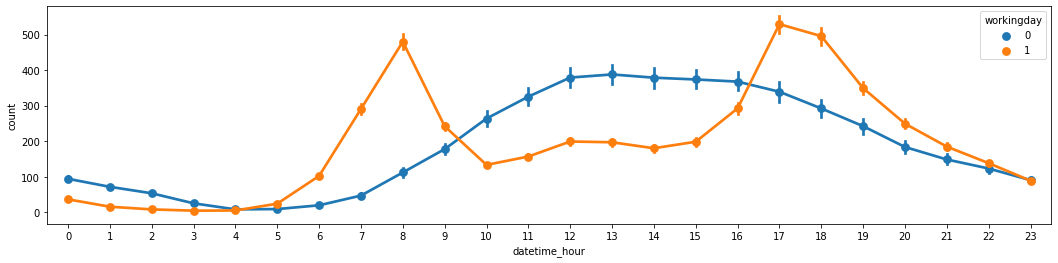

In [47]:
plt.figure(figsize=(18,4))
sns.pointplot(data= train, x='datetime_hour',y='count',hue='workingday')

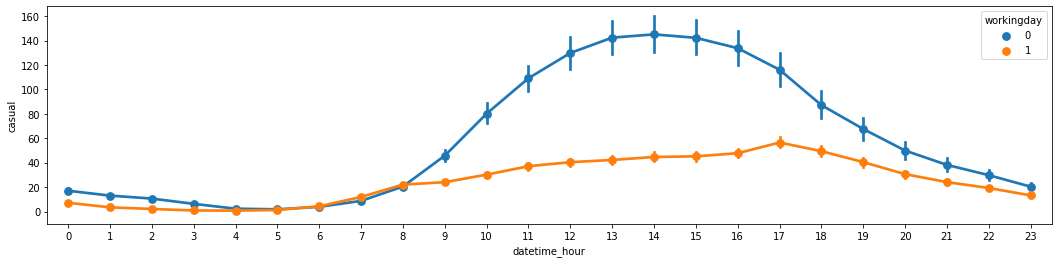

In [48]:
plt.figure(figsize = (18, 4))
sns.pointplot(data=train, x="datetime_hour", y="casual", hue="workingday")

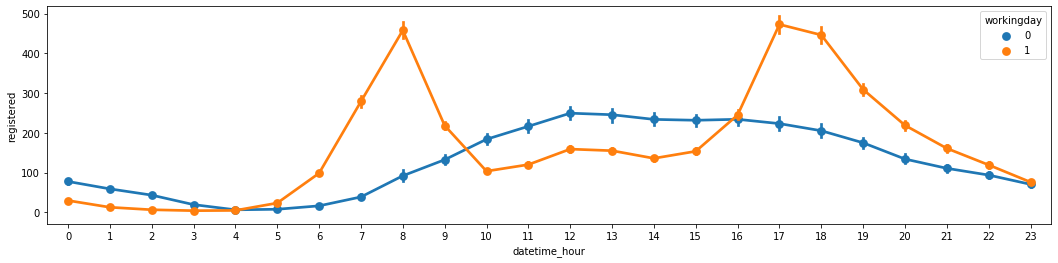

In [49]:
# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 근무일 여부(workingday)와 시간(datetime-hour)에 따른 회원의 자전거 변화량(registered)을 시각화합니다.
sns.pointplot(data=train, x="datetime_hour", y="registered", hue="workingday")

### Train

In [50]:
feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "datetime_year", "datetime_hour", "datetime-dayofweek(int)",
                'temp(difference)','datetime_oh_1','datetime_oh_2','datetime_oh_3',
                'datetime_oh_4','datetime_oh_5','datetime_oh_6','datetime_oh_7']
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime_year',
 'datetime_hour',
 'datetime-dayofweek(int)',
 'temp(difference)',
 'datetime_oh_1',
 'datetime_oh_2',
 'datetime_oh_3',
 'datetime_oh_4',
 'datetime_oh_5',
 'datetime_oh_6',
 'datetime_oh_7']

In [51]:
X_train = train[feature_names]
print(X_train.shape)

X_train.head()

(10886, 19)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime_year,datetime_hour,datetime-dayofweek(int),temp(difference),datetime_oh_1,datetime_oh_2,datetime_oh_3,datetime_oh_4,datetime_oh_5,datetime_oh_6,datetime_oh_7
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5,-4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5,-5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5,-5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5,-4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5,-4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(6493, 19)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime_year,datetime_hour,datetime-dayofweek(int),temp(difference),datetime_oh_1,datetime_oh_2,datetime_oh_3,datetime_oh_4,datetime_oh_5,datetime_oh_6,datetime_oh_7
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,-3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3,-3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3,-2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3,-2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [53]:
y_train_count = train["count"]
print(y_train_count.shape)
y_train_count.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [54]:
# 파이썬의 선형대수 패키지인 Numpy를 가져옵니다.
# 이를 줄여서 np라는 축약어로 사용합니다.
import numpy as np

# y_train_count에 log + 1 연산을 합니다.
# 이를 y_train_log_count라는 이름의 변수에 할당합니다.
y_train_log_count = np.log(y_train_count + 1)

# y_train_log_count 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(y_train_log_count.shape)

# y_train_log_count 데이터의 상위 5개를 띄웁니다.
y_train_log_count.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

In [55]:
# train 데이터의 두 번째 label에 해당하는 비회원의 자전거 대여량(casual)을 가져옵니다.
# 이를 y_train_casual이라는 이름의 변수에 할당합니다.
y_train_casual = train["casual"]

# y_train_casual 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(y_train_casual.shape)

# y_train_casual 데이터의 상위 5개를 띄웁니다.
y_train_casual.head()

(10886,)


0    3
1    8
2    5
3    3
4    0
Name: casual, dtype: int64

In [56]:
# y_train_casual에 log + 1 연산을 합니다.
# 이를 y_train_log_casual라는 이름의 변수에 할당합니다.
y_train_log_casual = np.log(y_train_casual + 1)

# y_train_log_casual 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(y_train_log_casual.shape)

# y_train_log_casual 데이터의 상위 5개를 띄웁니다.
y_train_log_casual.head()

(10886,)


0    1.386294
1    2.197225
2    1.791759
3    1.386294
4    0.000000
Name: casual, dtype: float64

In [57]:
# train 데이터의 세 번째 label에 해당하는 회원의 자전거 대여량(registered)을 가져옵니다.
# 이를 y_train_registered이라는 이름의 변수에 할당합니다.
y_train_registered = train["registered"]

# y_train_registered 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(y_train_registered.shape)

# y_train_registered 데이터의 상위 5개를 띄웁니다.
y_train_registered.head()

(10886,)


0    13
1    32
2    27
3    10
4     1
Name: registered, dtype: int64

In [58]:
# y_train_registered에 log + 1 연산을 합니다.
# 이를 y_train_log_registered라는 이름의 변수에 할당합니다.
y_train_log_registered = np.log(y_train_registered + 1)

# y_train_log_registered 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(y_train_log_registered.shape)

# y_train_log_registered 데이터의 상위 5개를 띄웁니다.
y_train_log_registered.head()

(10886,)


0    2.639057
1    3.496508
2    3.332205
3    2.397895
4    0.693147
Name: registered, dtype: float64

In [59]:
# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옵니다.
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor를 생성합니다. 실행할 때는 다음의 옵션이 들어갑니다.
# 1) n_estimators. 트리의 개수입니다. 10을 넣으면 10개의 트리를 생성합니다.
# 2) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
# 3) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
model = RandomForestRegressor(n_estimators=10,
                              n_jobs=-1,
                              random_state=37)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=37, verbose=0, warm_start=False)